In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings

warnings.filterwarnings('ignore')

# Load the datasets

train_df = pd.read_csv('Aalto_train.csv')
test_df = pd.read_csv('Aalto_test.csv')

# Data Preprocessing
def preprocess_data(df):
    df = df.drop(['MAC', 'ICMP_unused'], axis=1, errors='ignore')
    X = df.drop('Label', axis=1)
    y = df['Label']
    return X, y
    
X_train, y_train = preprocess_data(train_df)
X_test, y_test = preprocess_data(test_df)




In [22]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=26, max_features=26,min_samples_split= 6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Decision Tree Accuracy: 0.7504
Classification Report:
                    precision    recall  f1-score   support

             Aria       0.93      0.93      0.93        90
        D-LinkCam       0.86      0.95      0.90       954
     D-LinkDayCam       0.92      0.96      0.94       213
 D-LinkDoorSensor       0.86      0.93      0.90       447
    D-LinkHomeHub       0.63      0.75      0.69      1669
     D-LinkSensor       0.65      0.71      0.68      1328
      D-LinkSiren       0.57      0.65      0.61      1261
     D-LinkSwitch       0.75      0.72      0.74      1340
D-LinkWaterSensor       0.60      0.71      0.65      1255
        EdimaxCam       0.92      0.94      0.93       163
  EdimaxPlug1101W       0.59      0.68      0.63       222
  EdimaxPlug2101W       0.74      0.78      0.76       254
         EdnetCam       0.86      0.77      0.81        82
     EdnetGateway       0.95      0.93      0.94       142
    HomeMaticPlug       1.00      1.00      1.00       137


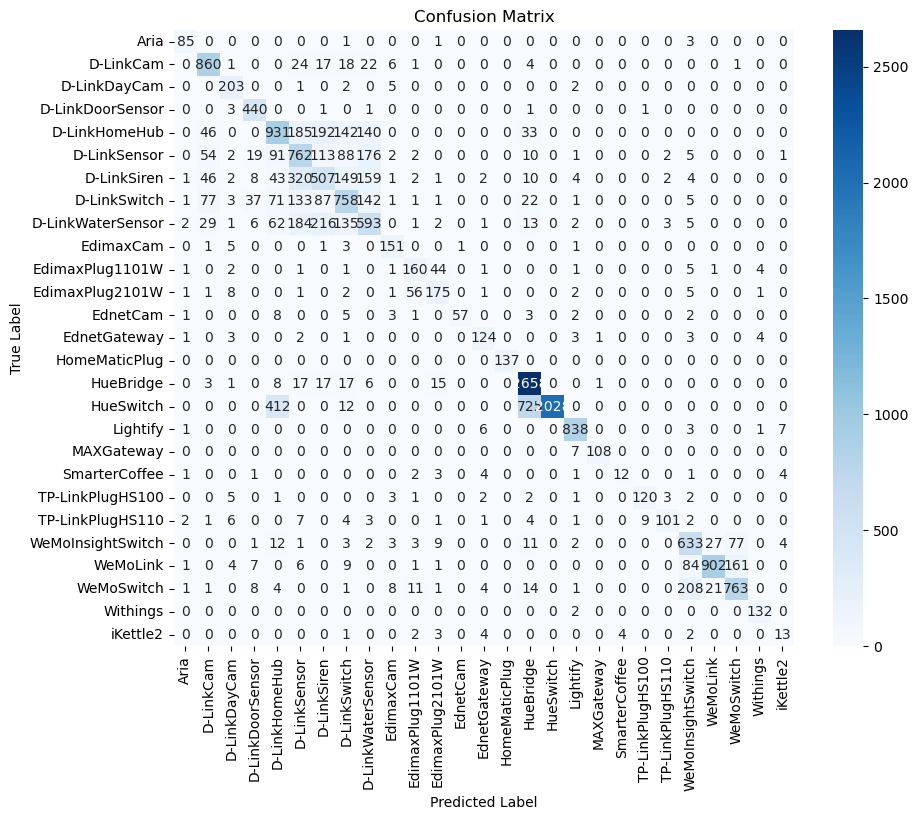

In [42]:
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
rf = RandomForestClassifier(bootstrap= True, criterion= "gini", max_depth= 18, max_features= 8, min_samples_split= 9, n_estimators= 96)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    


Random Forest Accuracy: 0.8648
Classification Report:
                    precision    recall  f1-score   support

             Aria       0.97      0.94      0.96        90
        D-LinkCam       0.96      0.97      0.97       954
     D-LinkDayCam       0.94      0.97      0.95       213
 D-LinkDoorSensor       0.88      0.99      0.93       447
    D-LinkHomeHub       0.91      0.92      0.92      1669
     D-LinkSensor       0.73      0.69      0.71      1328
      D-LinkSiren       0.85      0.73      0.78      1261
     D-LinkSwitch       0.89      0.85      0.87      1340
D-LinkWaterSensor       0.73      0.82      0.78      1255
        EdimaxCam       0.88      0.96      0.91       163
  EdimaxPlug1101W       0.78      0.80      0.79       222
  EdimaxPlug2101W       0.84      0.87      0.85       254
         EdnetCam       0.81      0.77      0.79        82
     EdnetGateway       0.94      0.93      0.93       142
    HomeMaticPlug       1.00      1.00      1.00       137


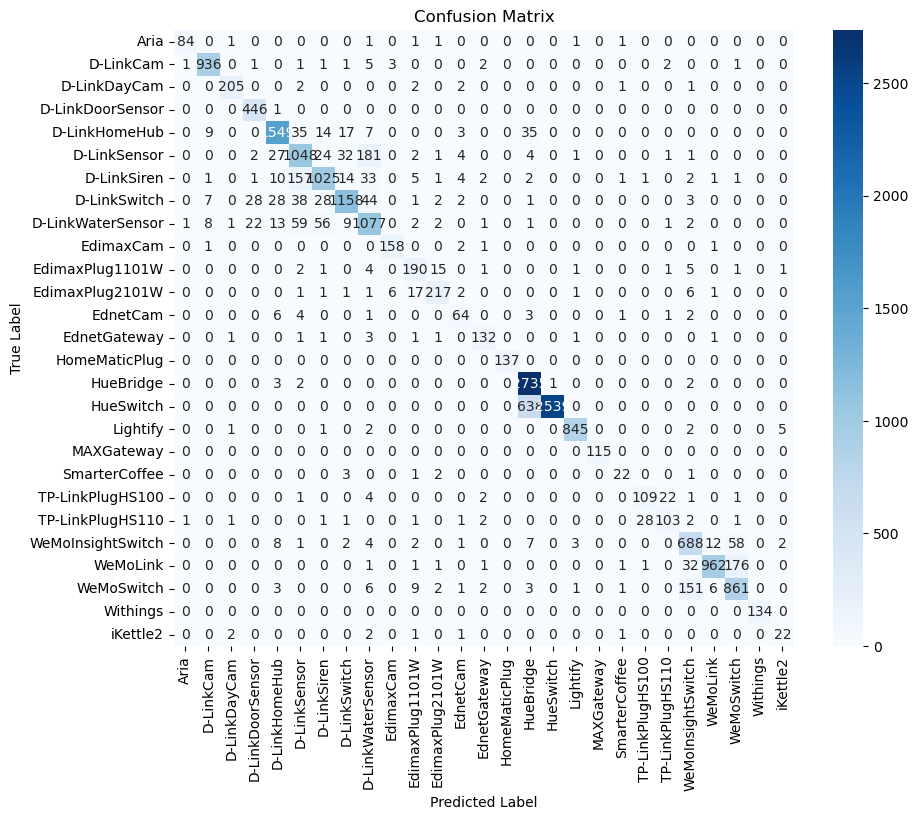

In [41]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
knn = KNeighborsClassifier(algorithm= 'brute', leaf_size= 41, n_neighbors= 48, weights= 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

KNN Accuracy: 0.8258
Classification Report:
                    precision    recall  f1-score   support

             Aria       0.34      0.79      0.47        90
        D-LinkCam       0.95      0.93      0.94       954
     D-LinkDayCam       0.93      0.94      0.94       213
 D-LinkDoorSensor       0.84      0.93      0.89       447
    D-LinkHomeHub       0.81      0.81      0.81      1669
     D-LinkSensor       0.81      0.78      0.80      1328
      D-LinkSiren       0.89      0.78      0.83      1261
     D-LinkSwitch       0.84      0.79      0.81      1340
D-LinkWaterSensor       0.89      0.80      0.84      1255
        EdimaxCam       0.96      0.93      0.94       163
  EdimaxPlug1101W       0.77      0.80      0.78       222
  EdimaxPlug2101W       0.84      0.76      0.80       254
         EdnetCam       0.82      0.72      0.77        82
     EdnetGateway       0.88      0.85      0.86       142
    HomeMaticPlug       1.00      1.00      1.00       137
        Hu

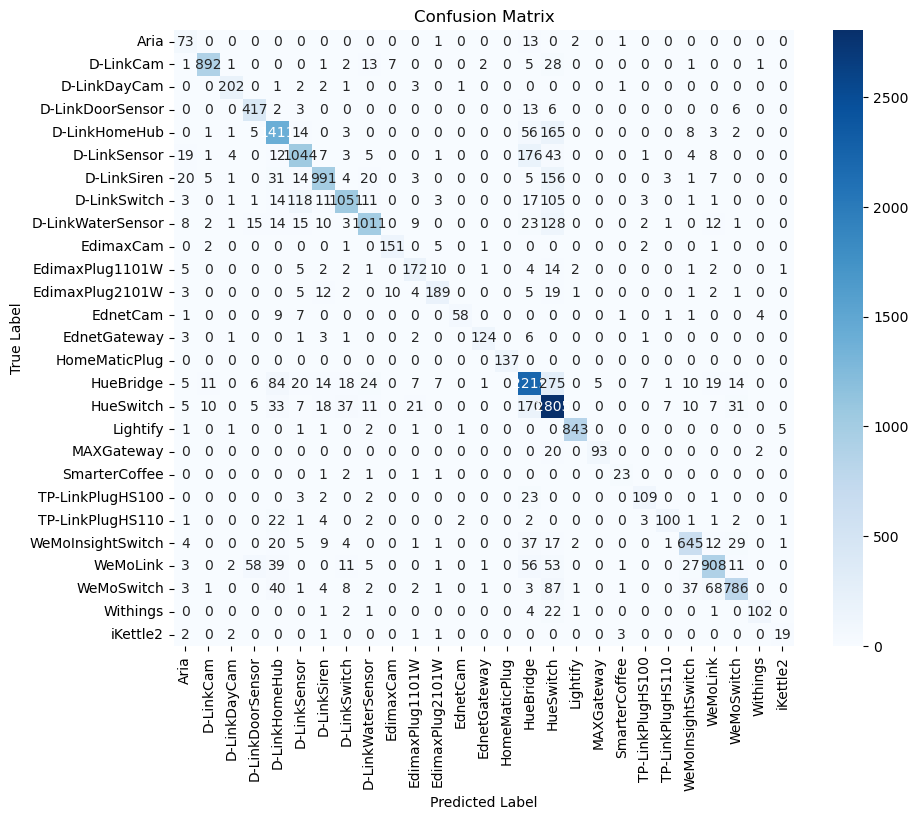

In [40]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, verbose=1, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, verbose=1, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print("Best KNN Parameters:", knn_grid_search.best_params_)

ensemble_model = VotingClassifier(
        estimators=[('dt', dt_grid_search.best_estimator_),
                    ('rf', rf_grid_search.best_estimator_),
                    ('knn', knn_grid_search.best_estimator_)],
        voting='hard'  
    )
    
ensemble_model.fit(X_train, y_train)
    
y_pred = ensemble_model.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model (VotingClassifier) Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best KNN Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Ensemble Model (VotingClassifier) Accuracy: 0.8788
Classification Report:
                    precision    recall  f1-score   support

             Aria       0.74      0.94      0.83        90
        D-LinkCam       0.90      0.99      0.94       954
     D-LinkDayCam       0.96      0.96      0.96       213
 D-LinkDoorSensor       0.82      1.00      0.90       447
    D-LinkHomeHub       0.90      0.93      0.91      1669
     D-LinkSensor       0.77      0.

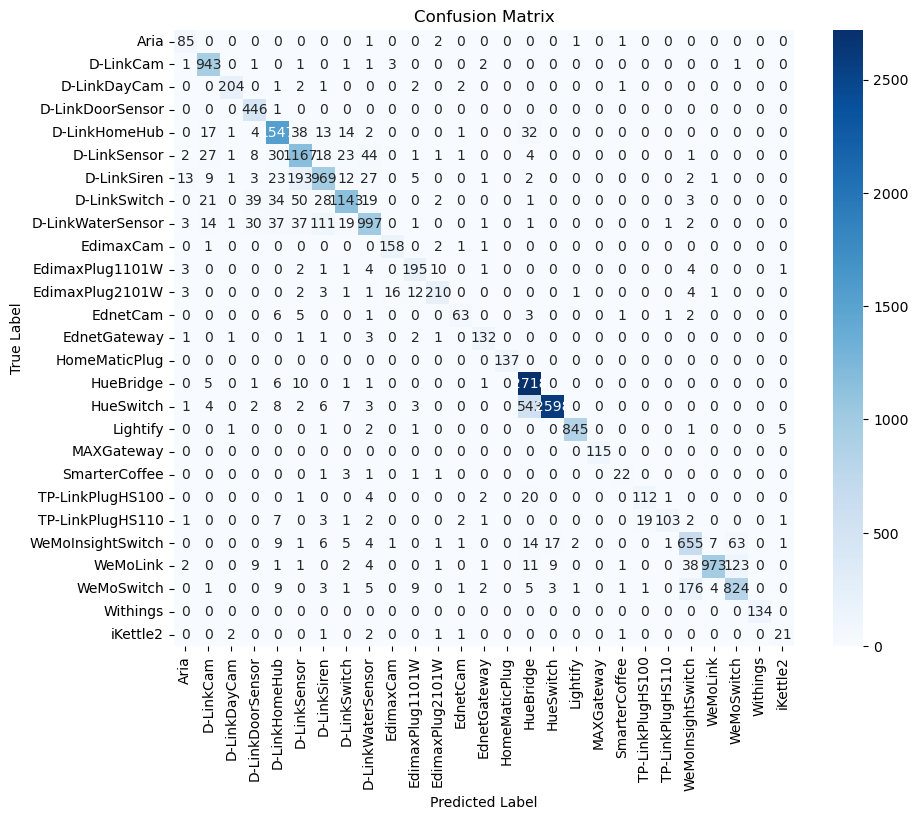

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = ensemble_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [34]:
#Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
#Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
#Best KNN Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=26,min_samples_split= 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
    
rf = RandomForestClassifier(bootstrap= True, criterion= "entropy", max_depth= None, min_samples_leaf=1, min_samples_split= 2, n_estimators= 50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
    
knn = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 5, weights= 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.7105
Random Forest Accuracy: 0.8799
KNN Accuracy: 0.8314


In [35]:
#Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
#Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
#Best KNN Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=26,min_samples_split= 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
    
rf = RandomForestClassifier(bootstrap= True, criterion= "entropy", max_depth= None, min_samples_leaf=1, min_samples_split= 2, n_estimators= 50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
    
knn = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 5, weights= 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.7150
Random Forest Accuracy: 0.8810
KNN Accuracy: 0.8314


In [49]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

# Load the datasets
train_df = pd.read_csv('Aalto_train.csv')
test_df = pd.read_csv('Aalto_test.csv')

# Data Preprocessing
def preprocess_data(df):
    df = df.drop(['MAC', 'ICMP_unused'], axis=1, errors='ignore')
    X = df.drop('Label', axis=1)
    y = df['Label']
    return X, y

X_train, y_train = preprocess_data(train_df)
X_test, y_test = preprocess_data(test_df)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after applying SMOTE
print(f"Original class distribution:\n{y_train.value_counts()}")
print(f"Class distribution after SMOTE:\n{y_train_resampled.value_counts()}")

# Initialize classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, verbose=1, n_jobs=-1)
dt_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, verbose=1, n_jobs=-1)
knn_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best KNN Parameters:", knn_grid_search.best_params_)

# Combine models into an ensemble
ensemble_model = VotingClassifier(
        estimators=[('dt', dt_grid_search.best_estimator_),
                    ('rf', rf_grid_search.best_estimator_),
                    ('knn', knn_grid_search.best_estimator_)],
        voting='hard'  
    )
    
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model (VotingClassifier) Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Original class distribution:
Label
HueSwitch            14649
HueBridge            11043
D-LinkHomeHub         6899
WeMoLink              5265
D-LinkSensor          5204
D-LinkSwitch          5199
D-LinkWaterSensor     5192
D-LinkCam             4994
D-LinkSiren           4949
WeMoInsightSwitch     4735
WeMoSwitch            3667
Lightify              3375
D-LinkDoorSensor      1534
EdimaxPlug1101W        896
D-LinkDayCam           849
EdimaxPlug2101W        764
EdimaxCam              666
Withings               555
EdnetGateway           546
TP-LinkPlugHS100       524
TP-LinkPlugHS110       512
HomeMaticPlug          507
MAXGateway             451
Aria                   351
EdnetCam               330
SmarterCoffee          121
iKettle2               117
Name: count, dtype: int64
Class distribution after SMOTE:
Label
Aria                 14649
HomeMaticPlug        14649
WeMoSwitch           14649
WeMoLink             14649
WeMoInsightSwitch    14649
TP-LinkPlugHS110     14649
TP-LinkPlu


KeyboardInterrupt



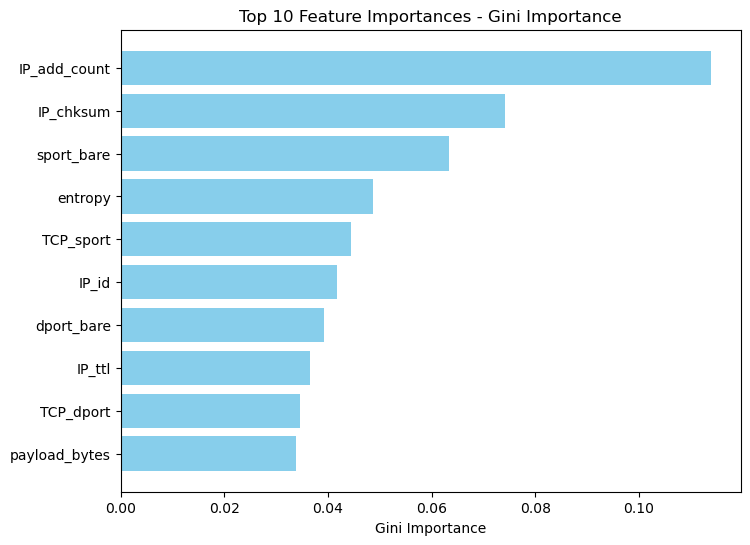

In [48]:
train_df = pd.read_csv('Aalto_train.csv')
test_df = pd.read_csv('Aalto_test.csv')

# Data Preprocessing
def preprocess_data(df):
    df = df.drop(['MAC', 'ICMP_unused'], axis=1, errors='ignore')
    X = df.drop('Label', axis=1)
    y = df['Label']
    return X, y

X_train, y_train = preprocess_data(train_df)
X_test, y_test = preprocess_data(test_df)

feature_names = X_test.columns  # This gives the feature names

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest
rf = RandomForestClassifier(bootstrap= True, criterion= "gini", max_depth= 18, max_features= 8, min_samples_split= 9, n_estimators= 96)
rf.fit(X_train, y_train)

# Get feature importance and RF predictions
feature_importances = rf.feature_importances_
rf_train_probs = rf.predict_proba(X_train)
rf_test_probs = rf.predict_proba(X_test)

# # Built-in feature importance (Gini Importance)
# feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': feature_importances}).sort_values('Gini Importance', ascending=False)
# print(feature_imp_df)

# Plot feature importance
sorted_idx = np.argsort(feature_importances)[::-1]  # Sorting in descending order
top_10_idx = sorted_idx[:10]  # Get the indices of the top 10 features
top_10_features = feature_names[top_10_idx]  # Top 10 feature names
top_10_importances = feature_importances[top_10_idx]  # Top 10 importances

# Plot the top 10 feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Top 10 Feature Importances - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()